# Block Release

This notebook contains the skeleton of the code to be used for the tasks.

## Imports

     -------------------------------------- 62.8/62.8 KB 478.0 kB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     -------------------------------------- 155.3/155.3 KB 1.2 MB/s eta 0:00:00
     -------------------------------------- 97.1/97.1 KB 694.7 kB/s eta 0:00:00
     ------------------------------------ 140.9/140.9 KB 643.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\cturn125\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt 

## Locations

In [4]:
# coordinates are latitude, longitude pairs
LOCATION_UNIVERSITY_PARK = (52.93726647677705, -1.1959384006396074)
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)
LOCATION_NOTTINGHAM_CITY_CENTRE = (52.953, -1.149)

## API

You will need to add more API URLs here as needed to complete the stories.

In [5]:
API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"
API_CRIME_CATEGORY = "https://data.police.uk/api/crime-categories"

## Crimes Near University Park Campus

Example function which calculates the number of crimes within 1 mile of University Park campus.

In [6]:
def count_crimes_within_1_mile(
    lat: float, lon: float, year: int, month: int
) -> int:
    """Calculate number of crimes within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"all-crime?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return len(response.json())
    else:
        print(f"Error retrieving data: {response.status_code}")


print(count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2023, 1))

135


## Crimes Categories

Example function which displays all URLs for each crime category

In [15]:
url = (API_CRIME_CATEGORY)
response = requests.get(url)
if response.status_code == 200:
    print(response.json())
else:
    print(f"Error retrieving data: {response.status_code}")

[{'url': 'all-crime', 'name': 'All crime'}, {'url': 'anti-social-behaviour', 'name': 'Anti-social behaviour'}, {'url': 'bicycle-theft', 'name': 'Bicycle theft'}, {'url': 'burglary', 'name': 'Burglary'}, {'url': 'criminal-damage-arson', 'name': 'Criminal damage and arson'}, {'url': 'drugs', 'name': 'Drugs'}, {'url': 'other-theft', 'name': 'Other theft'}, {'url': 'possession-of-weapons', 'name': 'Possession of weapons'}, {'url': 'public-order', 'name': 'Public order'}, {'url': 'robbery', 'name': 'Robbery'}, {'url': 'shoplifting', 'name': 'Shoplifting'}, {'url': 'theft-from-the-person', 'name': 'Theft from the person'}, {'url': 'vehicle-crime', 'name': 'Vehicle crime'}, {'url': 'violent-crime', 'name': 'Violence and sexual offences'}, {'url': 'other-crime', 'name': 'Other crime'}]


## Bike Thefts Near University Park Campus

Example function which calculates the number of bike thefts within 1 mile of University Park campus.

In [17]:
def count_biketheft_within_1_mile(
    lat: float, lon: float, year: int, month: int
) -> int:
    """Calculate number of bicycle thefts within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"bicycle-theft?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return len(response.json())
    else:
        print(f"Error retrieving data: {response.status_code}")


print(count_biketheft_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2023, 1))

7


05 - As an operations manager for security at the University of Nottingham, I want to know the number of bike thefts over the summer months in 2022 (July, August, September) at both University Park campus and Jubilee Campus so that I can appropriately allocate security officers to each location.

In [8]:
def bikethefts(location,year,month):
    lat=location[0]
    lon=location[1]
    url = (
            API_STREET_CRIME + f"bicycle-theft?lat={lat}&lng={lon}&date={year}-{month}"
        )
    response = requests.get(url)
    return pd.DataFrame(response.json())

In [20]:
july_uni=bikethefts(LOCATION_UNIVERSITY_PARK,2022,7)
aug_uni=bikethefts(LOCATION_UNIVERSITY_PARK,2022,8)
sep_uni=bikethefts(LOCATION_UNIVERSITY_PARK,2022,9)

july_jub=bikethefts(LOCATION_JUBILEE_CAMPUS,2022,7)
aug_jub=bikethefts(LOCATION_JUBILEE_CAMPUS,2022,8)
sep_jub=bikethefts(LOCATION_JUBILEE_CAMPUS,2022,9)

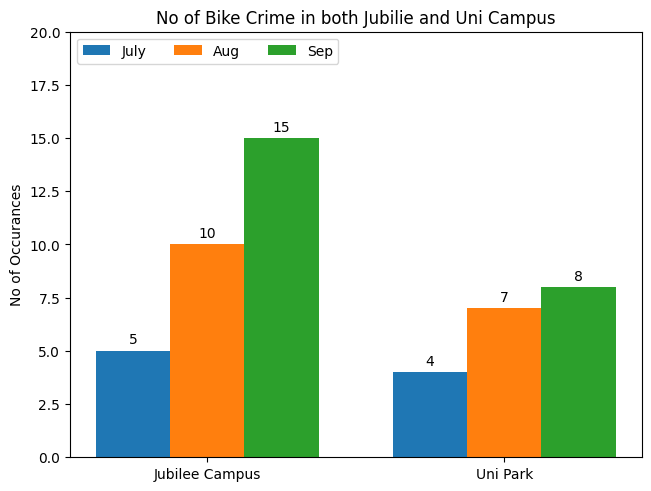

In [30]:
species = ("Jubilee Campus", "Uni Park")
penguin_means = {
    'July': (len(july_jub), len(july_uni)),
    'Aug': (len(aug_jub), len(aug_uni)),
    'Sep': (len(sep_jub), len(sep_uni)),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width,                label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('No of Occurances')
ax.set_title('No of Bike Crime in both Jubilie and Uni Campus')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()


SyntaxError: invalid syntax (875155531.py, line 1)